In [1]:
# test classification dataset
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=10000, n_features=50, n_informative=50, n_redundant=0, random_state=1)
# summarize the dataset
print(X.shape, y.shape)

(10000, 50) (10000,)


In [2]:
...
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=1)

<IPython.core.display.Javascript object>

In [4]:
...
# define the model
from xgboost import XGBClassifier
model = XGBClassifier()

In [5]:
...
# define the datasets to evaluate each iteration
evalset = [(X_train, y_train), (X_test,y_test)]

In [6]:
...
# fit the model
model.fit(X_train, y_train, eval_metric='logloss', eval_set=evalset)

[0]	validation_0-logloss:0.59135	validation_1-logloss:0.62292
[1]	validation_0-logloss:0.52201	validation_1-logloss:0.57855
[2]	validation_0-logloss:0.46324	validation_1-logloss:0.53822
[3]	validation_0-logloss:0.41242	validation_1-logloss:0.50522
[4]	validation_0-logloss:0.37203	validation_1-logloss:0.47906
[5]	validation_0-logloss:0.34117	validation_1-logloss:0.45538
[6]	validation_0-logloss:0.31263	validation_1-logloss:0.43821
[7]	validation_0-logloss:0.28817	validation_1-logloss:0.42351
[8]	validation_0-logloss:0.26831	validation_1-logloss:0.40886
[9]	validation_0-logloss:0.25296	validation_1-logloss:0.39517
[10]	validation_0-logloss:0.23563	validation_1-logloss:0.38356
[11]	validation_0-logloss:0.21897	validation_1-logloss:0.37000
[12]	validation_0-logloss:0.20026	validation_1-logloss:0.35480
[13]	validation_0-logloss:0.18666	validation_1-logloss:0.34446
[14]	validation_0-logloss:0.17134	validation_1-logloss:0.33251
[15]	validation_0-logloss:0.16181	validation_1-logloss:0.32547
[1

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

In [8]:
...
# evaluate performance
from sklearn.metrics import accuracy_score
yhat = model.predict(X_test)
score = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % score)

Accuracy: 0.945


In [9]:
...
# retrieve performance metrics
results = model.evals_result()

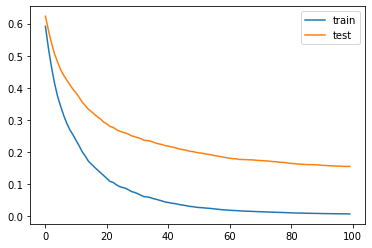

In [12]:
...
# plot learning curves
import matplotlib
import matplotlib.pyplot as pyplot
pyplot.plot(results['validation_0']['logloss'], label='train')
pyplot.plot(results['validation_1']['logloss'], label='test')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

[0]	validation_0-logloss:0.59135	validation_1-logloss:0.62292
[1]	validation_0-logloss:0.52201	validation_1-logloss:0.57855
[2]	validation_0-logloss:0.46324	validation_1-logloss:0.53822
[3]	validation_0-logloss:0.41242	validation_1-logloss:0.50522
[4]	validation_0-logloss:0.37203	validation_1-logloss:0.47906
[5]	validation_0-logloss:0.34117	validation_1-logloss:0.45538
[6]	validation_0-logloss:0.31263	validation_1-logloss:0.43821
[7]	validation_0-logloss:0.28817	validation_1-logloss:0.42351
[8]	validation_0-logloss:0.26831	validation_1-logloss:0.40886
[9]	validation_0-logloss:0.25296	validation_1-logloss:0.39517
[10]	validation_0-logloss:0.23563	validation_1-logloss:0.38356
[11]	validation_0-logloss:0.21897	validation_1-logloss:0.37000
[12]	validation_0-logloss:0.20026	validation_1-logloss:0.35480
[13]	validation_0-logloss:0.18666	validation_1-logloss:0.34446
[14]	validation_0-logloss:0.17134	validation_1-logloss:0.33251
[15]	validation_0-logloss:0.16181	validation_1-logloss:0.32547
[1

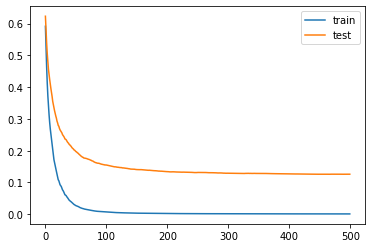

In [13]:
# plot learning curve of an xgboost model
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=10000, n_features=50, n_informative=50, n_redundant=0, random_state=1)
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=1)
# define the model
model = XGBClassifier(n_estimators=500)
# define the datasets to evaluate each iteration
evalset = [(X_train, y_train), (X_test,y_test)]
# fit the model
model.fit(X_train, y_train, eval_metric='logloss', eval_set=evalset)
# evaluate performance
yhat = model.predict(X_test)
score = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % score)
# retrieve performance metrics
results = model.evals_result()
# plot learning curves
pyplot.plot(results['validation_0']['logloss'], label='train')
pyplot.plot(results['validation_1']['logloss'], label='test')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

[0]	validation_0-logloss:0.67382	validation_1-logloss:0.67914
[1]	validation_0-logloss:0.65609	validation_1-logloss:0.66661
[2]	validation_0-logloss:0.63939	validation_1-logloss:0.65469
[3]	validation_0-logloss:0.62348	validation_1-logloss:0.64301
[4]	validation_0-logloss:0.60882	validation_1-logloss:0.63208
[5]	validation_0-logloss:0.59481	validation_1-logloss:0.62192
[6]	validation_0-logloss:0.58076	validation_1-logloss:0.61150
[7]	validation_0-logloss:0.56782	validation_1-logloss:0.60229
[8]	validation_0-logloss:0.55599	validation_1-logloss:0.59423
[9]	validation_0-logloss:0.54355	validation_1-logloss:0.58544
[10]	validation_0-logloss:0.53150	validation_1-logloss:0.57754
[11]	validation_0-logloss:0.52032	validation_1-logloss:0.56960
[12]	validation_0-logloss:0.50939	validation_1-logloss:0.56244
[13]	validation_0-logloss:0.49923	validation_1-logloss:0.55543
[14]	validation_0-logloss:0.48908	validation_1-logloss:0.54857
[15]	validation_0-logloss:0.47893	validation_1-logloss:0.54088
[1

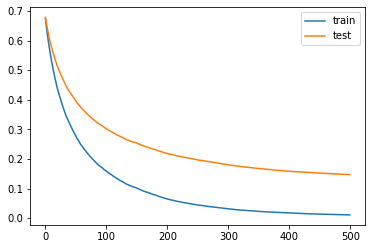

In [14]:
# plot learning curve of an xgboost model
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=10000, n_features=50, n_informative=50, n_redundant=0, random_state=1)
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=1)
# define the model
model = XGBClassifier(n_estimators=500, eta=0.05)
# define the datasets to evaluate each iteration
evalset = [(X_train, y_train), (X_test,y_test)]
# fit the model
model.fit(X_train, y_train, eval_metric='logloss', eval_set=evalset)
# evaluate performance
yhat = model.predict(X_test)
score = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % score)
# retrieve performance metrics
results = model.evals_result()
# plot learning curves
pyplot.plot(results['validation_0']['logloss'], label='train')
pyplot.plot(results['validation_1']['logloss'], label='test')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

[0]	validation_0-logloss:0.67382	validation_1-logloss:0.67914
[1]	validation_0-logloss:0.65609	validation_1-logloss:0.66661
[2]	validation_0-logloss:0.63939	validation_1-logloss:0.65469
[3]	validation_0-logloss:0.62348	validation_1-logloss:0.64301
[4]	validation_0-logloss:0.60882	validation_1-logloss:0.63208
[5]	validation_0-logloss:0.59481	validation_1-logloss:0.62192
[6]	validation_0-logloss:0.58076	validation_1-logloss:0.61150
[7]	validation_0-logloss:0.56782	validation_1-logloss:0.60229
[8]	validation_0-logloss:0.55599	validation_1-logloss:0.59423
[9]	validation_0-logloss:0.54355	validation_1-logloss:0.58544
[10]	validation_0-logloss:0.53150	validation_1-logloss:0.57754
[11]	validation_0-logloss:0.52032	validation_1-logloss:0.56960
[12]	validation_0-logloss:0.50939	validation_1-logloss:0.56244
[13]	validation_0-logloss:0.49923	validation_1-logloss:0.55543
[14]	validation_0-logloss:0.48908	validation_1-logloss:0.54857
[15]	validation_0-logloss:0.47893	validation_1-logloss:0.54088
[1

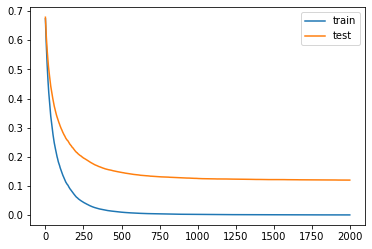

In [15]:
# plot learning curve of an xgboost model
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=10000, n_features=50, n_informative=50, n_redundant=0, random_state=1)
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=1)
# define the model
model = XGBClassifier(n_estimators=2000, eta=0.05)
# define the datasets to evaluate each iteration
evalset = [(X_train, y_train), (X_test,y_test)]
# fit the model
model.fit(X_train, y_train, eval_metric='logloss', eval_set=evalset)
# evaluate performance
yhat = model.predict(X_test)
score = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % score)
# retrieve performance metrics
results = model.evals_result()
# plot learning curves
pyplot.plot(results['validation_0']['logloss'], label='train')
pyplot.plot(results['validation_1']['logloss'], label='test')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

[0]	validation_0-logloss:0.67985	validation_1-logloss:0.68355
[1]	validation_0-logloss:0.66507	validation_1-logloss:0.67200
[2]	validation_0-logloss:0.65050	validation_1-logloss:0.66140
[3]	validation_0-logloss:0.63701	validation_1-logloss:0.65136
[4]	validation_0-logloss:0.62590	validation_1-logloss:0.64259
[5]	validation_0-logloss:0.61497	validation_1-logloss:0.63399
[6]	validation_0-logloss:0.60297	validation_1-logloss:0.62450
[7]	validation_0-logloss:0.59173	validation_1-logloss:0.61587
[8]	validation_0-logloss:0.58035	validation_1-logloss:0.60706
[9]	validation_0-logloss:0.57137	validation_1-logloss:0.60007
[10]	validation_0-logloss:0.56398	validation_1-logloss:0.59509
[11]	validation_0-logloss:0.55537	validation_1-logloss:0.58840
[12]	validation_0-logloss:0.54615	validation_1-logloss:0.58176
[13]	validation_0-logloss:0.53771	validation_1-logloss:0.57529
[14]	validation_0-logloss:0.52906	validation_1-logloss:0.56901
[15]	validation_0-logloss:0.52152	validation_1-logloss:0.56315
[1

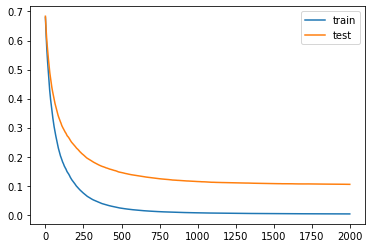

In [16]:
# plot learning curve of an xgboost model
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=10000, n_features=50, n_informative=50, n_redundant=0, random_state=1)
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=1)
# define the model
model = XGBClassifier(n_estimators=2000, eta=0.05, subsample=0.5, colsample_bytree=0.5)
# define the datasets to evaluate each iteration
evalset = [(X_train, y_train), (X_test,y_test)]
# fit the model
model.fit(X_train, y_train, eval_metric='logloss', eval_set=evalset)
# evaluate performance
yhat = model.predict(X_test)
score = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % score)
# retrieve performance metrics
results = model.evals_result()
# plot learning curves
pyplot.plot(results['validation_0']['logloss'], label='train')
pyplot.plot(results['validation_1']['logloss'], label='test')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()